In [1]:
import psycopg2
import config as creds
import sqlalchemy
from sqlalchemy import create_engine
import numpy as np
from numpy.random import randn
import pandas as pd
import seaborn as sns
from scipy import stats
from datetime import datetime

CONNECT TO DATABASE:

In [2]:
user=creds.PGUSER
password=creds.PGPASSWORD
host=creds.PGHOST
port=5432
database=creds.PGDATABASE

engine_str=f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(engine_str)
conn = engine.raw_connection()
print('Connected')
cur = conn.cursor()
print('Cursor created')

Connected
Cursor created


QUERY THE DATABASE:
- GLOBAL (ALL BUILDINGS)
- ELECTRICITY
- 2018-2019

In [3]:
#Electricity, 2018-2019 
query='''
SELECT b.kbtu
      ,b.REPORTEDBUILDINGGROSSFLOORAREA
      ,b.ward
      ,b.yearbuilt
      ,b.primarypropertytype_selfselect
      ,b.elegas
      ,n.awnd
      ,n.cldd
      ,n.htdd
      ,n.tavg
      ,n.snow
      ,n.date 
FROM buildings_data b
LEFT OUTER join noaa_data n
ON b.REPORTINGYEAR = n.WEATHERYEAR
WHERE b.MONTH = n.MONTH
AND b.ELEGAS = 'E'
--AND b.PRIMARYPROPERTYTYPE_SELFSELECT = '14'
AND b.REPORTINGYEAR BETWEEN 2018 AND 2019
AND b.YEARBUILT > 0
AND b.REPORTEDBUILDINGGROSSFLOORAREA > 50000
--AND b.DCREALPROPERTYID = '0453_5030'
AND b.WARD>0;
'''

data=pd.read_sql(query,conn)
data.head()

,kbtu,reportedbuildinggrossfloorarea,ward,yearbuilt,primarypropertytype_selfselect,elegas,awnd,cldd,htdd,tavg,snow,date
0,22915.4,79920.0,5,1918,19,E,9.8,0.0,906.0,35.8,1.2,2018-01
1,727362.1,486912.0,6,1974,7,E,9.8,0.0,906.0,35.8,1.2,2018-01
2,0.0,139000.0,6,1929,7,E,9.8,0.0,906.0,35.8,1.2,2018-01
3,156435.8,88648.0,2,1923,7,E,9.8,0.0,906.0,35.8,1.2,2018-01
4,706024.7,175900.0,2,2001,7,E,9.8,0.0,906.0,35.8,1.2,2018-01


In [4]:
data['datetime']=pd.to_datetime(data['date'])

PLOT ELECTRICITY TIME SERIES TRENDS FOR ALL BUILDINGS:

<AxesSubplot:xlabel='date', ylabel='kbtu'>

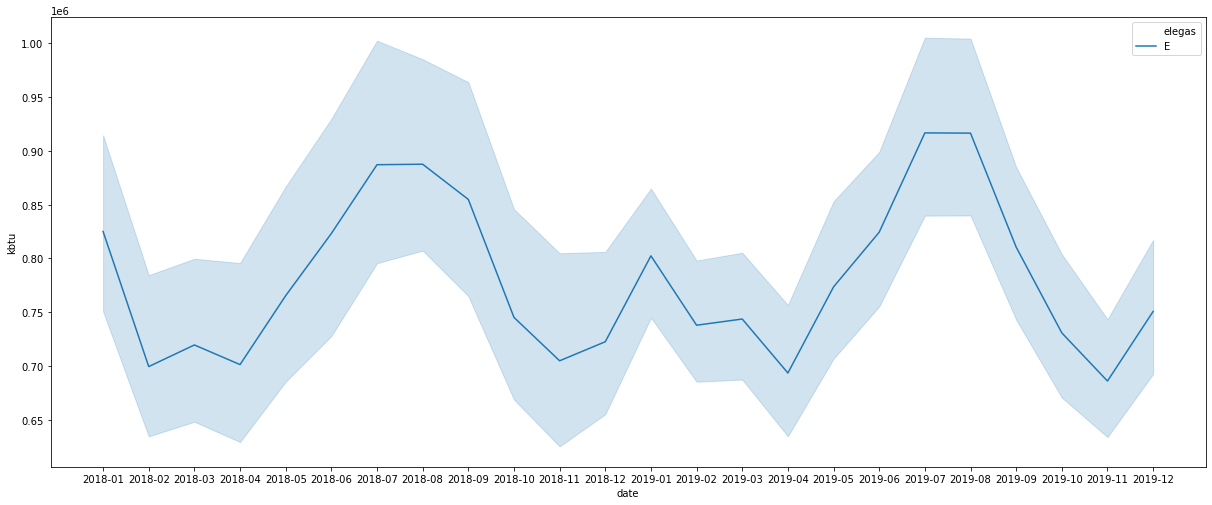

In [5]:
from matplotlib import pyplot
a4_dims = (20.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(x="date", y="kbtu", hue="elegas", data=data)

In [6]:
data.describe()

,kbtu,reportedbuildinggrossfloorarea,ward,yearbuilt,awnd,cldd,htdd,tavg,snow
count,4.114800e+04,4.114800e+04,41148.000000,41148.000000,41148.000000,41148.000000,41148.000000,41148.000000,41148.000000
mean,7.800416e+05,2.080820e+05,3.435987,1968.936133,8.591679,167.846408,311.506100,60.184592,0.947752
std,1.696949e+06,2.713162e+05,2.025324,32.565439,1.120733,190.728214,319.921807,16.043050,2.431218
min,0.000000e+00,5.001800e+04,1.000000,1727.000000,7.200000,0.000000,0.000000,35.800000,0.000000
25%,1.737083e+05,7.987500e+04,2.000000,1950.000000,7.600000,0.000000,1.000000,44.875000,0.000000
50%,4.196285e+05,1.348610e+05,2.000000,1969.000000,8.300000,60.500000,196.000000,62.450000,0.000000
75%,9.081327e+05,2.481433e+05,5.000000,1998.000000,9.200000,336.000000,584.500000,76.200000,0.325000
max,6.527130e+07,5.754738e+06,8.000000,2017.000000,11.600000,529.000000,906.000000,82.100000,11.500000


In [7]:
data.shape

(41148, 13)

In [8]:
data.isnull().values.any()

False

In [9]:
#Dates
#data["reportingyear"] = data["reportingyear"].astype(str)
#data['month']=data['month'].apply(lambda x: '{0:0>2}'.format(x))
#data['date_time'] = data[['reportingyear', 'month']].agg('-'.join, axis=1)
#data['date_time'] = (data.date_time + "-01")
#data['date_time'] = datetime.strptime('date_time', "%Y-%m-%d")
data['datetime']=pd.to_datetime(data['date'])

In [10]:
data['primarypropertytype_selfselect']=data['primarypropertytype_selfselect'].astype('int32')

In [11]:
data.set_index('datetime', inplace=True)
data.head()

,kbtu,reportedbuildinggrossfloorarea,ward,yearbuilt,primarypropertytype_selfselect,elegas,awnd,cldd,htdd,tavg,snow,date
datetime,,,,,,,,,,,,
2018-01-01,22915.4,79920.0,5,1918,19,E,9.8,0.0,906.0,35.8,1.2,2018-01
2018-01-01,727362.1,486912.0,6,1974,7,E,9.8,0.0,906.0,35.8,1.2,2018-01
2018-01-01,0.0,139000.0,6,1929,7,E,9.8,0.0,906.0,35.8,1.2,2018-01
2018-01-01,156435.8,88648.0,2,1923,7,E,9.8,0.0,906.0,35.8,1.2,2018-01
2018-01-01,706024.7,175900.0,2,2001,7,E,9.8,0.0,906.0,35.8,1.2,2018-01


In [12]:
data.columns

Index(['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'yearbuilt',
       'primarypropertytype_selfselect', 'elegas', 'awnd', 'cldd', 'htdd',
       'tavg', 'snow', 'date'],
      dtype='object')

In [13]:
data.dtypes

kbtu                              float64
reportedbuildinggrossfloorarea    float64
ward                                int64
yearbuilt                           int64
primarypropertytype_selfselect      int32
elegas                             object
awnd                              float64
cldd                              float64
htdd                              float64
tavg                              float64
snow                              float64
date                               object
dtype: object

TRANSFORMATIONS:

In [14]:
#TIME BASED TRANSFORMERS

TARGET = "kbtu"
COLS = ['ward', 'yearbuilt', 'primarypropertytype_selfselect', 'awnd', 'cldd', 'htdd', 'tavg', 'snow', 'datetime', 'reportedbuildinggrossfloorarea'] 
       

def make_sklearn_data(df=data, target=TARGET, cols=COLS):
    df = df.reset_index()
    X, y = df[cols], df[target]
    return X, y

<AxesSubplot:xlabel='datetime_cos', ylabel='datetime_sin'>

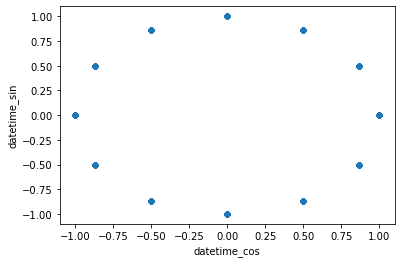

In [15]:
#CYCLIC ENCODER:
from sklearn.base import BaseEstimator, TransformerMixin


class CyclicEncoder(BaseEstimator, TransformerMixin):
    
    def __init__(self, date_extract="month"):
        if date_extract not in {"minute", "hour", "week", "month", "year"}:
            raise ValueError(f"specify correct date component to extract, not {date_extract}")
        self.date_extract = date_extract
    
    def get_date_component(self, x):
        if self.date_extract == "month":
            return x.dt.month
        elif self.date_extract == "year":
            return x.dt.year
        else:
            raise NotImplementedError(f"{self.date_extract} date component not implemented yet")
            
    def fit(self, X, y=None):
        self.cycle_max_ = self.get_date_component(X).max()
        return self

    def transform(self, X,  y=None):
        cols = []
        names = []
        x = self.get_date_component(X)
        xn = 2 * np.pi * x / self.cycle_max_
        cols.append(np.cos(xn))
        names.append(f"{X.name}_cos")
        cols.append(np.sin(xn))
        names.append(f"{X.name}_sin")
        return pd.DataFrame(np.asarray(cols).T, columns=names)

    
ce = CyclicEncoder().fit_transform(data.reset_index()["datetime"])
ce.plot(x="datetime_cos", y="datetime_sin", kind="scatter")

CORRELATION VISUALIZATIONS:

In [16]:
features = ['ward', 'yearbuilt', 'primarypropertytype_selfselect', 'awnd', 'cldd', 'htdd', 'tavg', 'snow', 'reportedbuildinggrossfloorarea']
       
X, y = make_sklearn_data(cols=features)

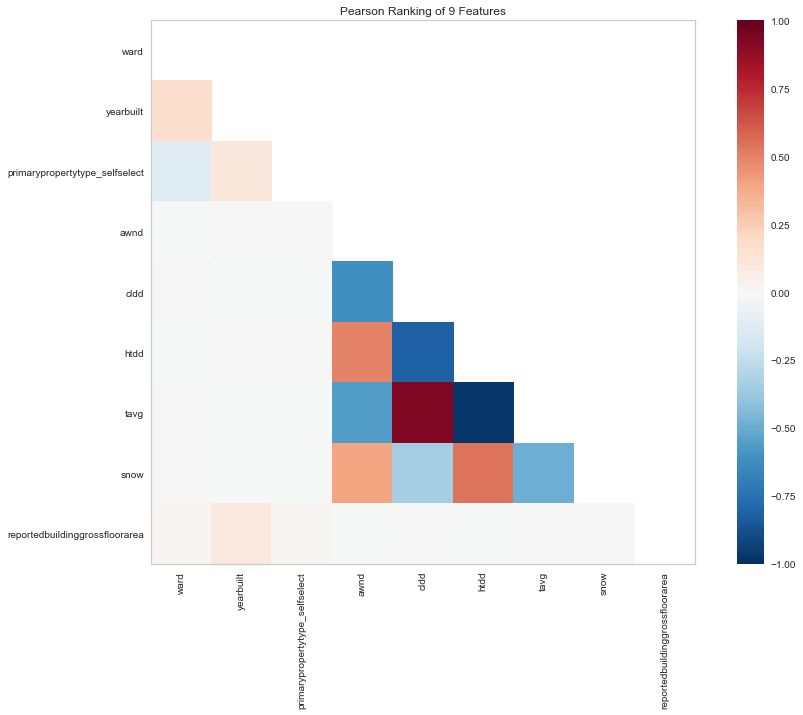

<AxesSubplot:title={'center':'Pearson Ranking of 9 Features'}>

In [17]:
#Rank2D Pearson
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm='pearson', features=features, size=(1080, 720))

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.show()

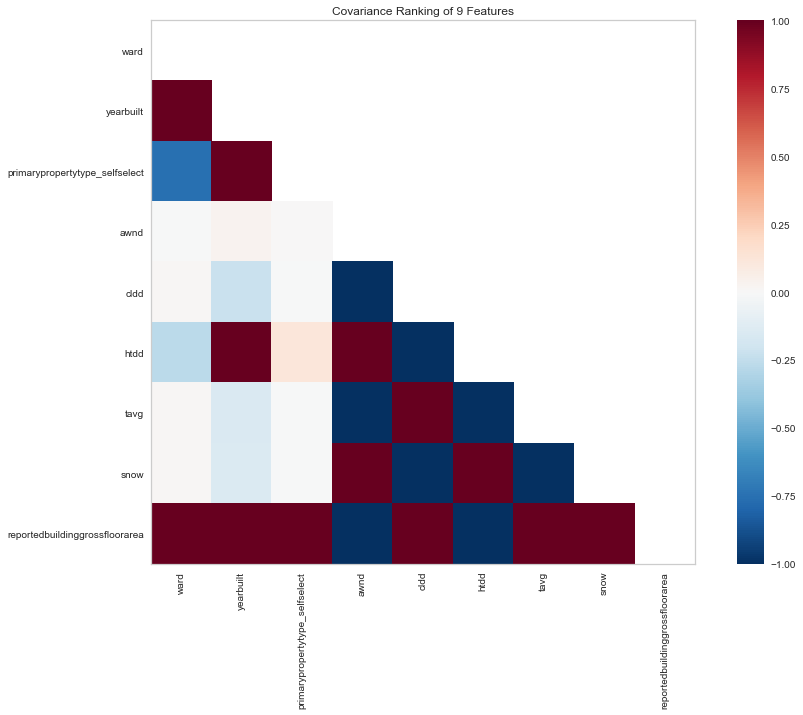

<AxesSubplot:title={'center':'Covariance Ranking of 9 Features'}>

In [18]:
#Rank2D Covariance
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm='covariance', features=features, size=(1080, 720))

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.show()

C:\Users\rv14996\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\rv14996\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


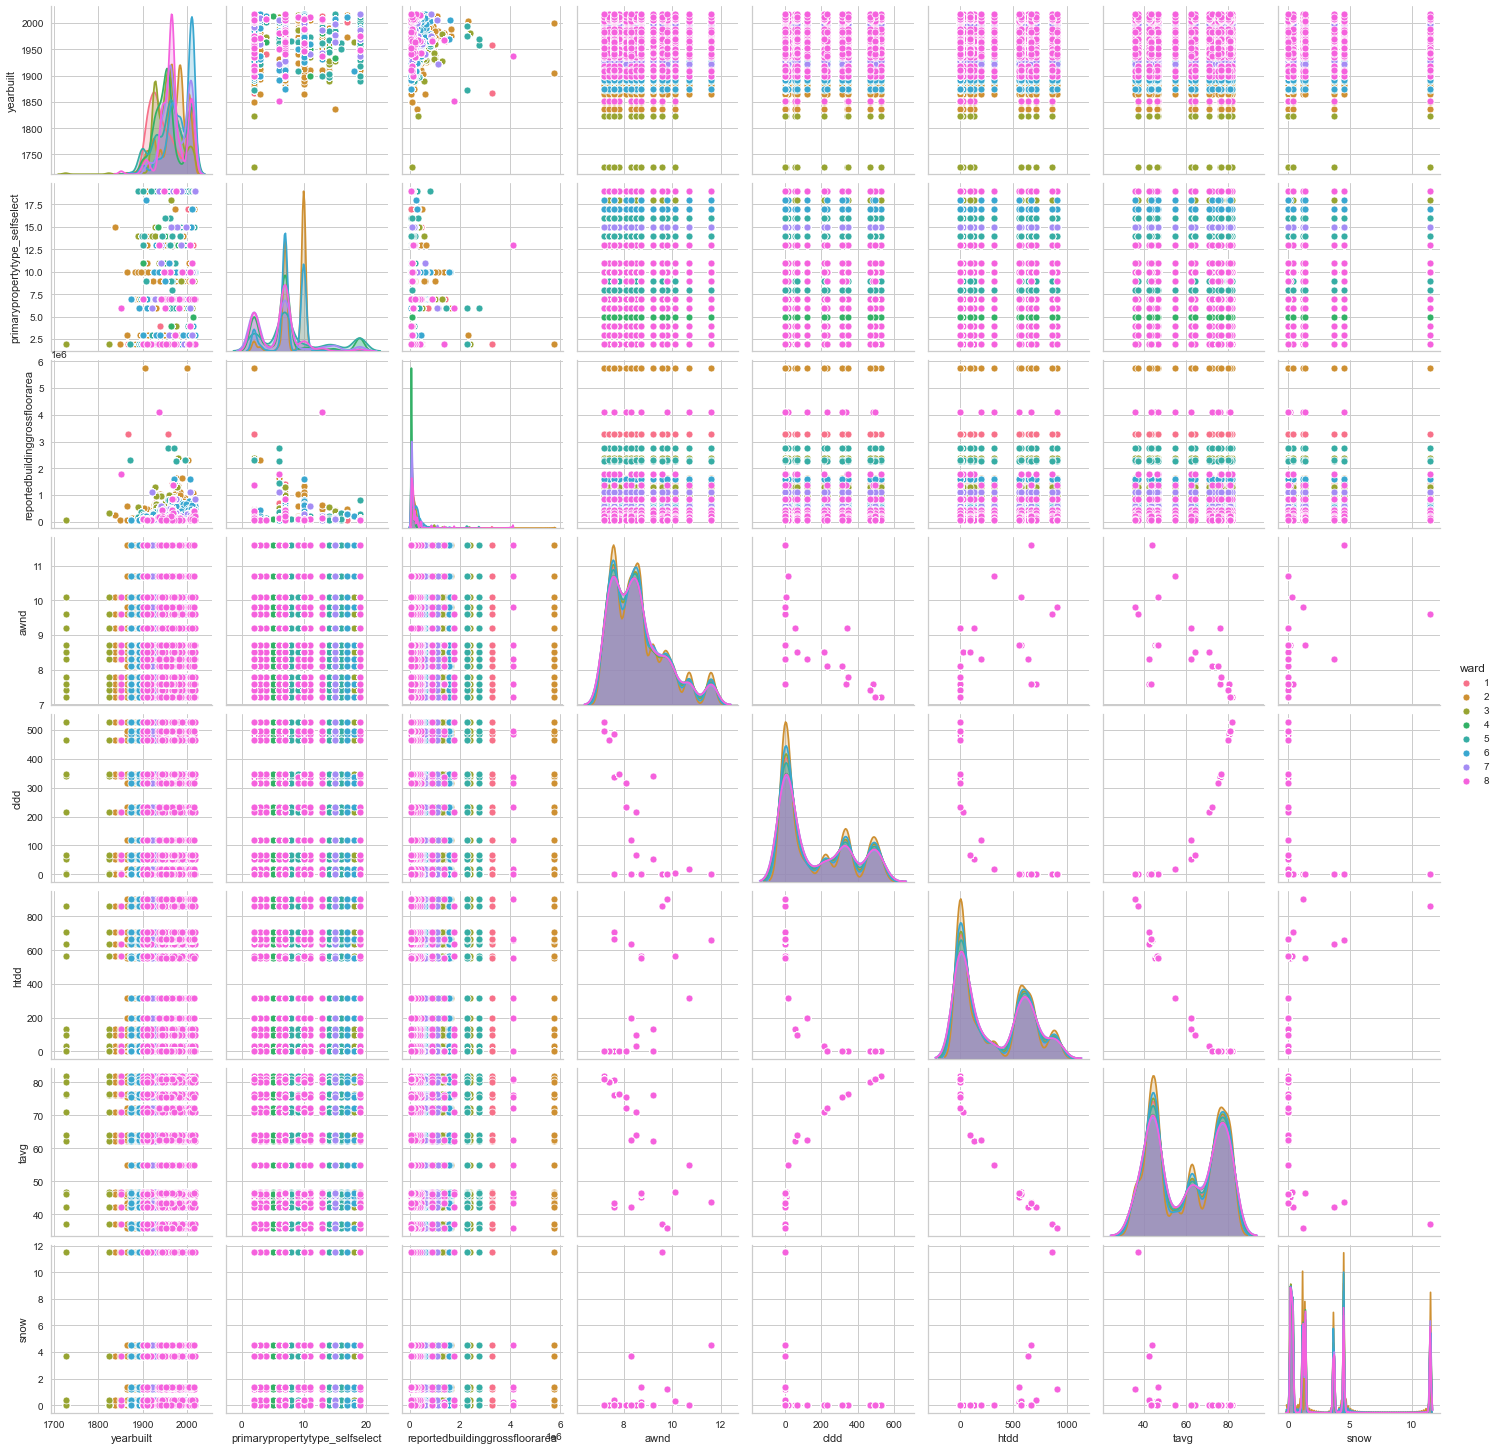

In [19]:
#Scatterplot Matrices
g = sns.pairplot(data=data[['ward', 'yearbuilt', 'primarypropertytype_selfselect', 'reportedbuildinggrossfloorarea', 'awnd',
       'cldd', 'htdd', 'tavg', 'snow']], hue='ward', dropna=True)

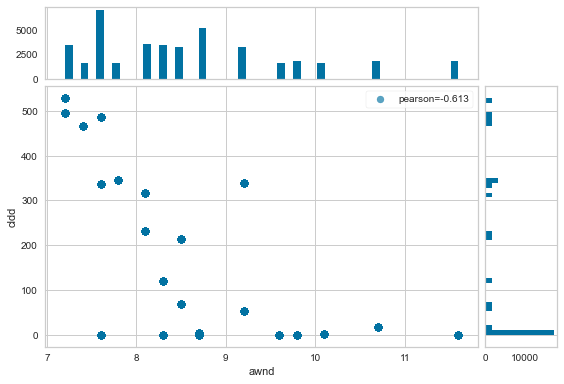

<AxesSubplot:xlabel='awnd', ylabel='cldd'>

In [20]:
#JointPlot 1
from yellowbrick.features import JointPlotVisualizer

visualizer = JointPlotVisualizer(columns=["awnd", "cldd"])

visualizer.fit_transform(X, y)
visualizer.show()

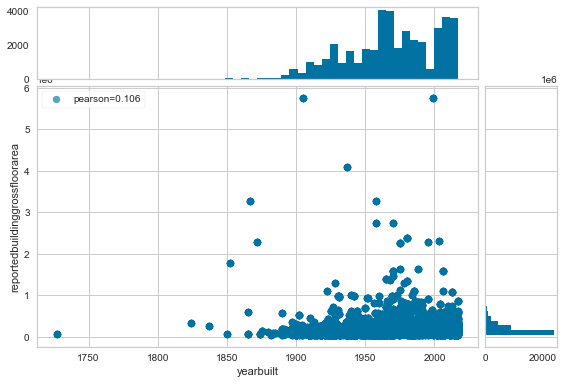

<AxesSubplot:xlabel='yearbuilt', ylabel='reportedbuildinggrossfloorarea'>

In [21]:
#JointPlot 2
visualizer = JointPlotVisualizer(columns=["yearbuilt", "reportedbuildinggrossfloorarea"])

visualizer.fit_transform(X, y)
visualizer.show()

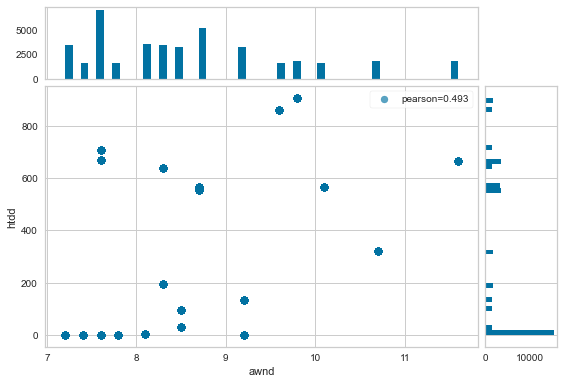

<AxesSubplot:xlabel='awnd', ylabel='htdd'>

In [22]:
#JointPlot 3
visualizer = JointPlotVisualizer(columns=["awnd", "htdd"])

visualizer.fit_transform(X, y)
visualizer.show()

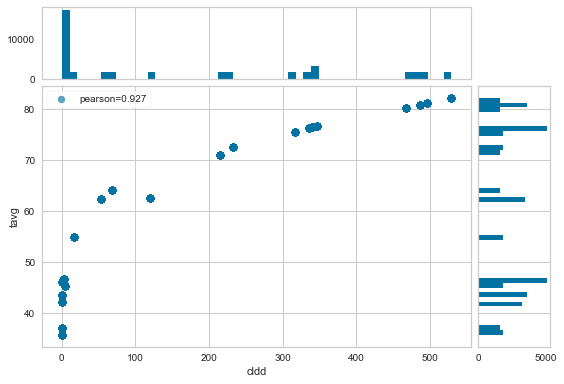

<AxesSubplot:xlabel='cldd', ylabel='tavg'>

In [23]:
#JointPlot 4
visualizer = JointPlotVisualizer(columns=["cldd", "tavg"])

visualizer.fit_transform(X, y)
visualizer.show()

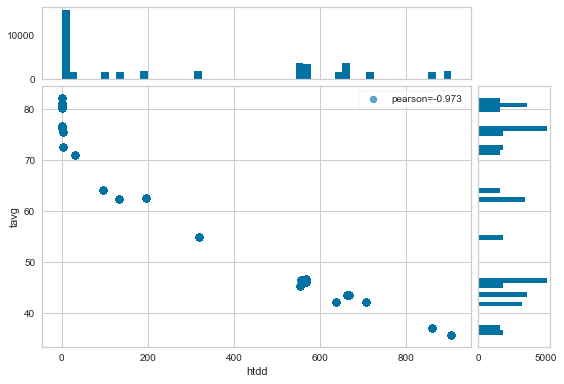

<AxesSubplot:xlabel='htdd', ylabel='tavg'>

In [24]:
#JointPlot 5
visualizer = JointPlotVisualizer(columns=["htdd", "tavg"])

visualizer.fit_transform(X, y)
visualizer.show()

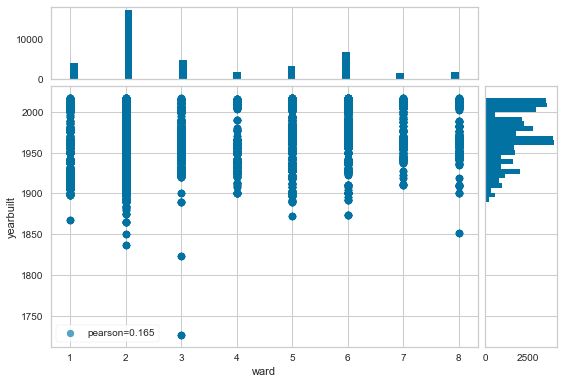

<AxesSubplot:xlabel='ward', ylabel='yearbuilt'>

In [25]:
#JointPlot 6
visualizer = JointPlotVisualizer(columns=["ward", "yearbuilt"])

visualizer.fit_transform(X, y)
visualizer.show()

FEATURE SELECTION AND ENGINEERING VISUALIZATIONS:

C:\Users\rv14996\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


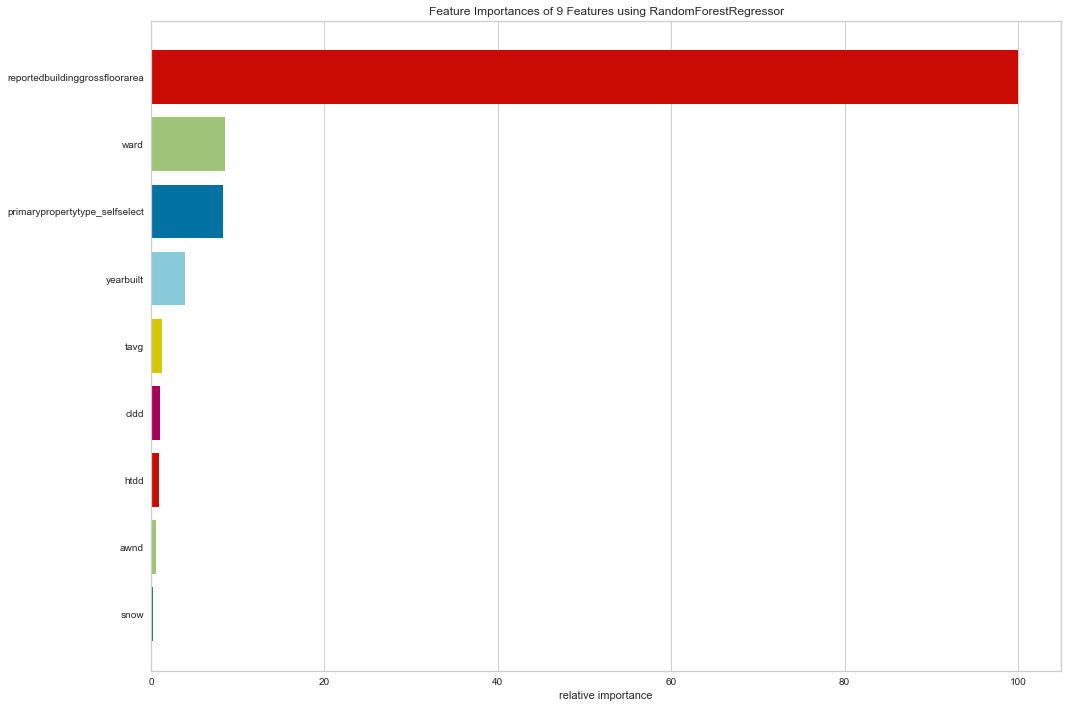

<AxesSubplot:title={'center':'Feature Importances of 9 Features using RandomForestRegressor'}, xlabel='relative importance'>

In [26]:
#Feature Importances Random Forest
import yellowbrick as yb
from sklearn.ensemble import RandomForestRegressor
from yellowbrick.features import RadViz
from yellowbrick.features import FeatureImportances


model = RandomForestRegressor(n_estimators=10)
viz = FeatureImportances(model, labels=features, size=(1080, 720))

viz.fit(X, y)
viz.show()

C:\Users\rv14996\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\rv14996\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7928493746374922e+16, tolerance: 11848841535101.082
  positive)


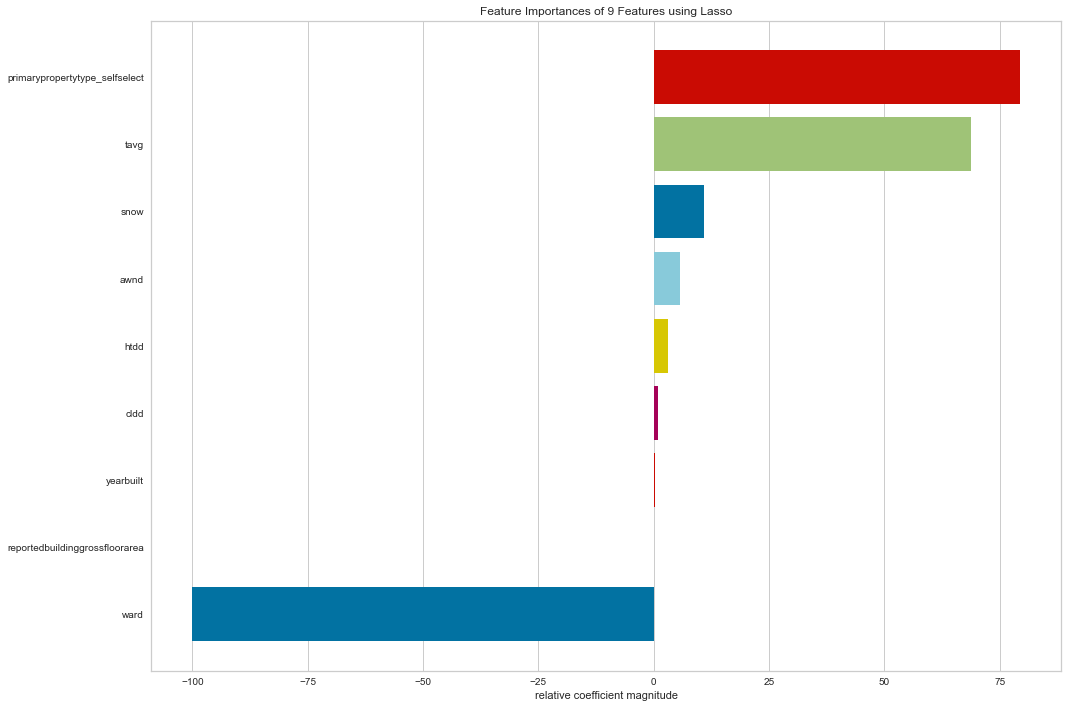

<AxesSubplot:title={'center':'Feature Importances of 9 Features using Lasso'}, xlabel='relative coefficient magnitude'>

In [27]:
#Feature Importances Lasso
import yellowbrick as yb
from sklearn.linear_model import Lasso
from yellowbrick.features import RadViz
from yellowbrick.features import FeatureImportances


model = Lasso()
viz = FeatureImportances(model, labels=features, size=(1080, 720))

viz.fit(X, y)
viz.show()

EXTRACTION PIPELINE:

In [28]:
#FEATURE EXTRACTION
from sklearn.base import clone
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import OneHotEncoder

extraction = Pipeline([
    ('column_selection', ColumnTransformer([
        ('time_components', FeatureUnion([
            ('month', CyclicEncoder(date_extract='month')), 
            ('year', CyclicEncoder(date_extract='year')), 
        ]), 'datetime'),
        ('ward_one_hot', OneHotEncoder(handle_unknown='ignore'), ['ward']),
        ('yearbuilt_one_hot', OneHotEncoder(handle_unknown='ignore'), ['yearbuilt']),
        ('type_one_hot', OneHotEncoder(handle_unknown='ignore'), ['primarypropertytype_selfselect']),
    ], remainder="passthrough")),
])

def make_energy_pipeline(model, append_transformers=None, fe=extraction):
    pipe = clone(fe)
    
    if append_transformers:
        for step in append_transformers:
            pipe.steps.append(step)
    
    pipe.steps.append(["model", clone(model)])
    return pipe

In [29]:
#Test the Feature Extraction Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(*make_sklearn_data(), test_size=0.2)

model = make_energy_pipeline(LinearRegression())
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7095105293837048

In [30]:
#TIME SERIES CROSS VALIDATION
from functools import partial
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

rmse = partial(mean_squared_error, squared=False)


def time_series_evaluate(model, X, y):
    """
    Performs time series cross validation on the model, returning the
    cross validated r2, mse, and mae of the regressor, along with the 
    final fitted model, fitted on all of the data.
    """
    cv = TimeSeriesSplit(12)
    scores = {}
    
    scores["r2"] = cross_val_score(model, X, y, cv=cv, scoring=make_scorer(r2_score))
    scores["mse"] = cross_val_score(model, X, y, cv=cv, scoring=make_scorer(mean_squared_error))
#     scores["rmse"] = cross_val_score(model, X, y, cv=cv, scoring=make_scorer(rmse))
    scores["mae"] = cross_val_score(model, X, y, cv=cv, scoring=make_scorer(mean_absolute_error))
    
    model.fit(X, y)
    return model, scores

MODELING OUTPUTS:

In [31]:
# LINEAR MODEL
X, y = make_sklearn_data()
lm = make_energy_pipeline(LinearRegression())
time_series_evaluate(lm, X, y)

(Pipeline(steps=[('column_selection',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('time_components',
                                                   FeatureUnion(transformer_list=[('month',
                                                                                   CyclicEncoder()),
                                                                                  ('year',
                                                                                   CyclicEncoder(date_extract='year'))]),
                                                   'datetime'),
                                                  ('ward_one_hot',
                                                   OneHotEncoder(handle_unknown='ignore'),
                                                   ['ward']),
                                                  ('yearbuilt_one_hot',
                                                   OneHotEncoder(hand

In [33]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures

qm = make_energy_pipeline(SGDRegressor(), [('quad', PolynomialFeatures(2))]) 
time_series_evaluate(qm, X, y)

(Pipeline(steps=[('column_selection',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('time_components',
                                                   FeatureUnion(transformer_list=[('month',
                                                                                   CyclicEncoder()),
                                                                                  ('year',
                                                                                   CyclicEncoder(date_extract='year'))]),
                                                   'datetime'),
                                                  ('ward_one_hot',
                                                   OneHotEncoder(handle_unknown='ignore'),
                                                   ['ward']),
                                                  ('yearbuilt_one_hot',
                                                   OneHotEncoder(hand

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

qm = make_energy_pipeline(LinearRegression(fit_intercept=False), [('quad', PolynomialFeatures(2))])
time_series_evaluate(qm, X, y)

(Pipeline(steps=[('column_selection',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('time_components',
                                                   FeatureUnion(transformer_list=[('month',
                                                                                   CyclicEncoder()),
                                                                                  ('year',
                                                                                   CyclicEncoder(date_extract='year'))]),
                                                   'datetime'),
                                                  ('ward_one_hot',
                                                   OneHotEncoder(handle_unknown='ignore'),
                                                   ['ward']),
                                                  ('yearbuilt_one_hot',
                                                   OneHotEncoder(hand

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

qm = make_energy_pipeline(LinearRegression(fit_intercept=False), [('cub', PolynomialFeatures(3))])
time_series_evaluate(qm, X, y)

(Pipeline(steps=[('column_selection',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('time_components',
                                                   FeatureUnion(transformer_list=[('month',
                                                                                   CyclicEncoder()),
                                                                                  ('year',
                                                                                   CyclicEncoder(date_extract='year'))]),
                                                   'datetime'),
                                                  ('ward_one_hot',
                                                   OneHotEncoder(handle_unknown='ignore'),
                                                   ['ward']),
                                                  ('yearbuilt_one_hot',
                                                   OneHotEncoder(hand

LOOP THROUGH AND SCORE DIFFERENT MODELS:

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
from sklearn.svm import SVR, LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split as tts

In [38]:
features = ['ward', 'yearbuilt', 'primarypropertytype_selfselect', 'awnd', 'cldd', 'htdd', 'tavg', 'snow', 'reportedbuildinggrossfloorarea']
       
X, y = make_sklearn_data(cols=features)

In [39]:
regressors = [
    SVR(),
    Lasso(),
    Ridge(),
    LinearSVR(),
    ElasticNet(),
    MLPRegressor(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
]

In [40]:
def score_model(X, y, estimator):
    """
    Split the data into train and test splits and evaluate the mode
    """
    X_train, X_test, y_train, y_test = tts(X, y)
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    print("{}: {}".format(estimator.__class__.__name__, r2_score(y_test, y_pred))) #mean_squared_error

In [41]:
for regressor in regressors:
    score_model(X, y, regressor)

SVR: -0.04243737766407696
Lasso: 0.6980283225691044
Ridge: 0.6667532043888603
LinearSVR: 0.5056541871951903
ElasticNet: 0.7517200097753511
MLPRegressor: 0.6889803545385447
KNeighborsRegressor: 0.9496908957906842
DecisionTreeRegressor: 0.9466190274048091
RandomForestRegressor: 0.9556336712383767


LOOP THROUGH AND VISUALIZE DIFFERENT MODELS:

In [42]:
def visualize_model(X, y, estimator):
    """
    Visually evaluate the regressor's performance across the train and test data
    """
    X_train, X_test, y_train, y_test = tts(X, y)

    visualizer = ResidualsPlot(estimator)

    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

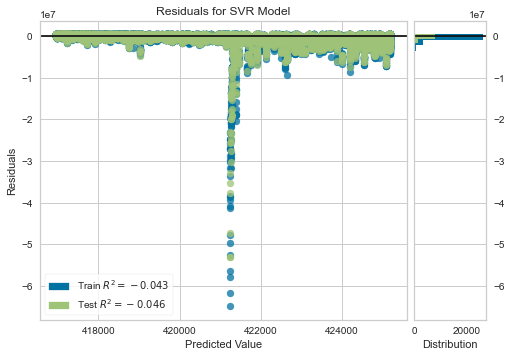

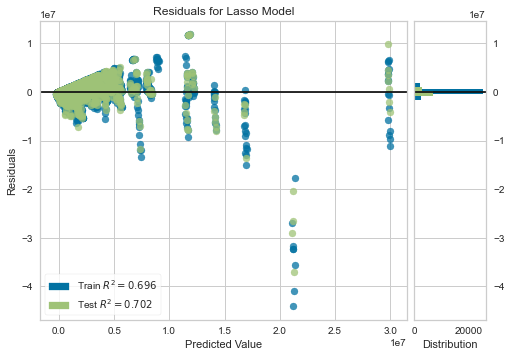

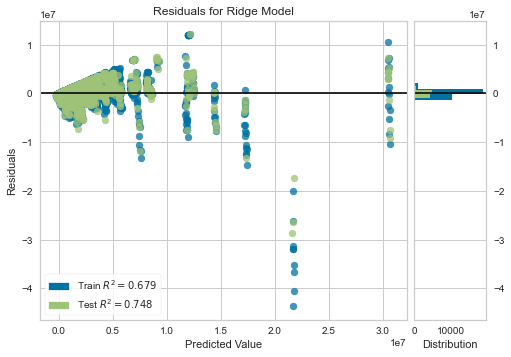

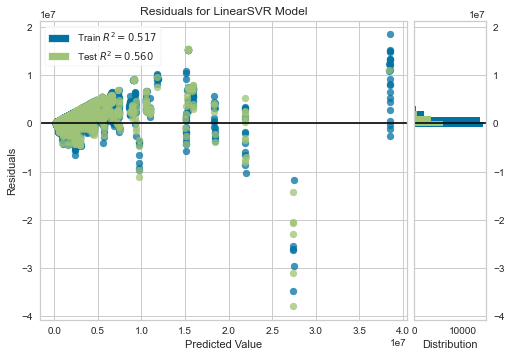

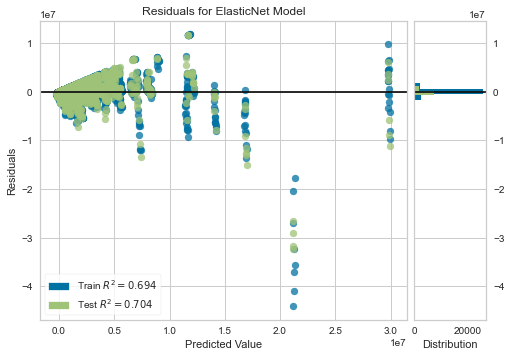

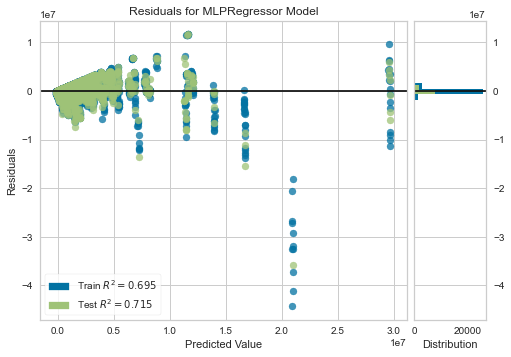

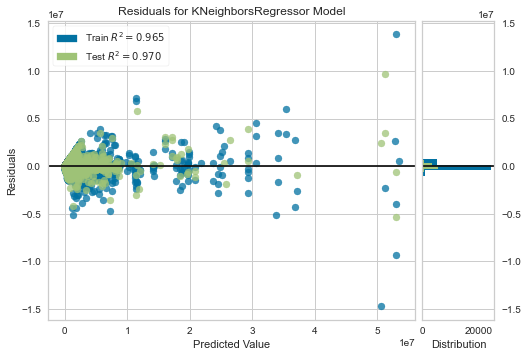

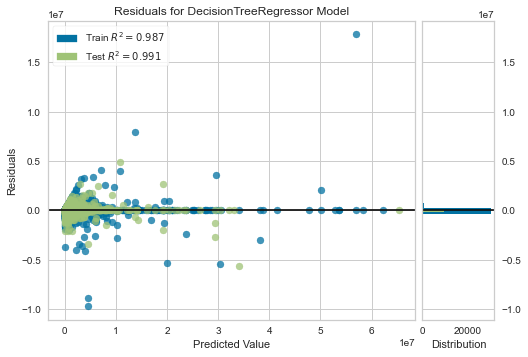

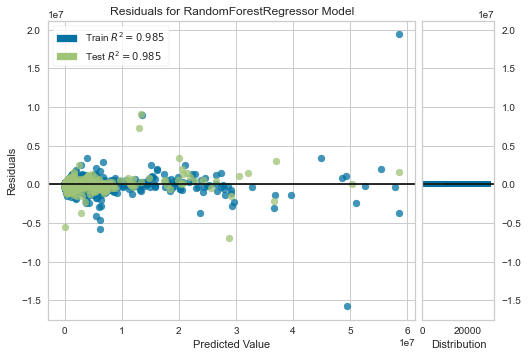

In [43]:
from yellowbrick.regressor import ResidualsPlot
for regressor in regressors:
    visualize_model(X, y, regressor)

In [44]:
conn.close()
print('Closed')

Closed
